In [22]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
import bs4 as bs
import nltk

In [23]:
data = pd.read_csv('QueryResults.csv')

In [24]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how do I calculate a rolling idxmax,<p>consider the <code>pd.Series</code> <code>s...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,0.0,6
1,Better techniques for trimming leading zeros i...,"<p>I've been using <a href=""https://stackoverf...",<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,0.0,19
2,"""No X11 DISPLAY variable"" - what does it mean?",<p>I am trying to install a Java application o...,<java><linux><variables><x11><headless>,662421,122,622820,0.0,12
3,Object-Oriented Callbacks for C++?,<p>Is there some library that allows me to eas...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,0.0,6
4,Why doesn't .NET find the OpenSSL.NET dll?,"<p><strong>EDIT</strong> (the whole question, ...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,0.0,12


In [26]:
#delete balises html with beautiful soup
def clean_html(text):
    soup = bs.BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Body'] = data['Body'].apply(clean_html)

In [27]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how do I calculate a rolling idxmax,consider the pd.Series s\nimport pandas as pd\...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,0.0,6
1,Better techniques for trimming leading zeros i...,I've been using this for some time:\nSUBSTRING...,<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,0.0,19
2,"""No X11 DISPLAY variable"" - what does it mean?",I am trying to install a Java application on m...,<java><linux><variables><x11><headless>,662421,122,622820,0.0,12
3,Object-Oriented Callbacks for C++?,Is there some library that allows me to easily...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,0.0,6
4,Why doesn't .NET find the OpenSSL.NET dll?,"EDIT (the whole question, it was too unclear)\...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,0.0,12


In [29]:
data.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
7160,JVM crashes under stress on RHEL 5.2,I've got (the currently latest) jdk 1.6.0.18 c...,<java><jvm><crash><segmentation-fault><rhel>,2247340,10,2852,0.0,7
26635,Batched Media Upload to Azure Blob Storage thr...,My web app currently allows users to upload me...,<javascript><c#><azure><asp.net-web-api><azure...,45377336,10,768,0.0,3
24910,Why does Console.Out.WriteLine exist?,Actually the question should be why does Conso...,<c#><.net><windows><console-application><refle...,1149131,37,14766,0.0,2
40310,Remembering where a mouse clicked? ArrayLists?...,"Sorry guys, I deleted my APPLES and CATS examp...",<java><swing><arraylist><jlabel><jlist>,8330787,11,1812,NaN,2
29237,How is BackgroundWorker.CancellationPending th...,The way to cancel a BackgroundWorker's operati...,<c#><.net><multithreading><thread-safety><back...,6966573,23,7436,0.0,4


In [30]:
data = data[['Title', 'Body', 'Tags']]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [33]:
data.nunique()

Title    49999
Body     50000
Tags     49190
dtype: int64

In [34]:
data.isna().sum()

Title    0
Body     0
Tags     0
dtype: int64

In [35]:
data.describe(include=object)

,Title,Body,Tags
count,50000,50000,50000
unique,49999,50000,49190
top,A potentially dangerous Request.Form value was...,consider the pd.Series s\nimport pandas as pd\...,<angular><typescript><ionic-framework><ionic2>...
freq,2,1,24


In [37]:
data.Body.apply(lambda i : len(i))

0         754
1         585
2        2111
3        1307
4        1165
         ... 
49995     195
49996    2821
49997     450
49998    1179
49999    1449
Name: Body, Length: 50000, dtype: int64

<AxesSubplot: xlabel='Body', ylabel='Density'>

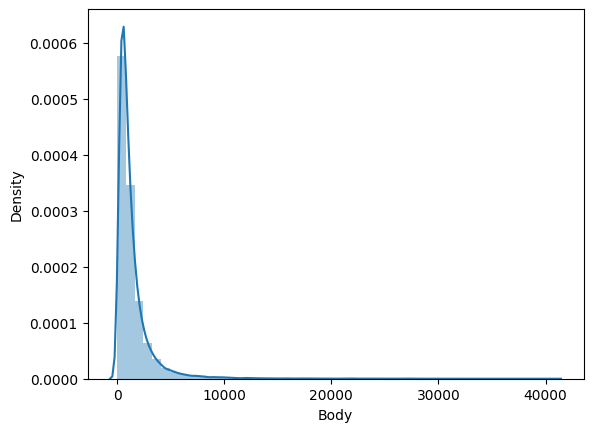

In [40]:
tmp = data.Body.str.len()
sns.distplot(tmp)

<AxesSubplot: xlabel='Title', ylabel='Density'>

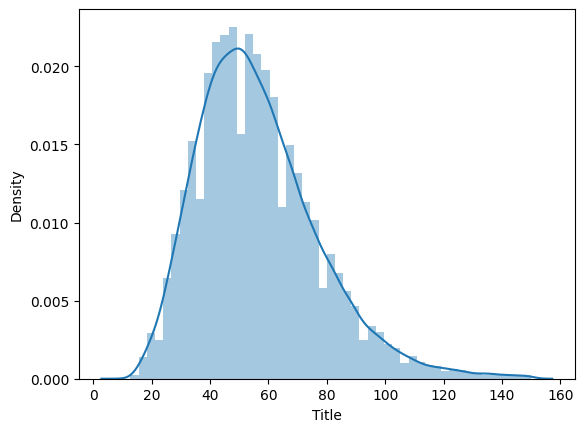

In [41]:
tmp = data.Title.str.len()
sns.distplot(tmp)

In [51]:
for idx, ser in data.sample(3).iterrows():
      print(ser['Title'])
      print(ser['Body'])
      print(ser['Tags'])
      print('')
      print('----'*30)
      print('')

MATLAB is running out of memory but it should not be
I'm trying to apply PCA on my data using princomp(x), that has been standardized.
The data is <16 x 1036800 double>. This runs our of memory which is too be expected except for the fact that this is a new computer, the computer holds 24GB of RAM for data mining. MATLAB even lists the 24GB available on a memory check.
Is MATLAB actually running out of memory while performing a PCA or is MATLAB not using the RAM to it's full potential? Any information or ideas would be helpful. (I may need to increase the virtual memory but assumed the 24GB would have sufficed.)

<matlab><memory><out-of-memory><linear-algebra><pca>

------------------------------------------------------------------------------------------------------------------------

How to "pass on" a variable number of arguments to NSString's +stringWithFormat:
I would like to write a function in Objective-C such as the one below, that takes a variable number of arguments, and pass